# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.364149e+01     1.431242e+01
 * time: 0.004647970199584961
     1     6.252417e+01     1.009194e+01
 * time: 0.013525962829589844
     2     5.607331e+01     1.497656e+01
 * time: 0.034722089767456055
     3     4.016127e+01     1.039289e+01
 * time: 0.06441807746887207
     4     2.970779e+01     8.402057e+00
 * time: 0.09540891647338867
     5     2.349377e+01     6.538360e+00
 * time: 0.12206506729125977
     6     1.077555e+01     2.649830e+00
 * time: 0.15204501152038574
     7     8.035269e+00     2.103547e+00
 * time: 0.17425298690795898
     8     6.596839e+00     1.451444e+00
 * time: 0.2599070072174072
     9     6.428742e+00     1.236773e+00
 * time: 0.2773871421813965
    10     6.197183e+00     1.272572e+00
 * time: 0.2948479652404785
    11     5.984583e+00     6.265714e-01
 * time: 0.3121070861816406
    12     5.973712e+00     1.929531e+00
 * time: 0.32561492919921875
    13     5.968851e+00     1.628420e+00
 * time: 

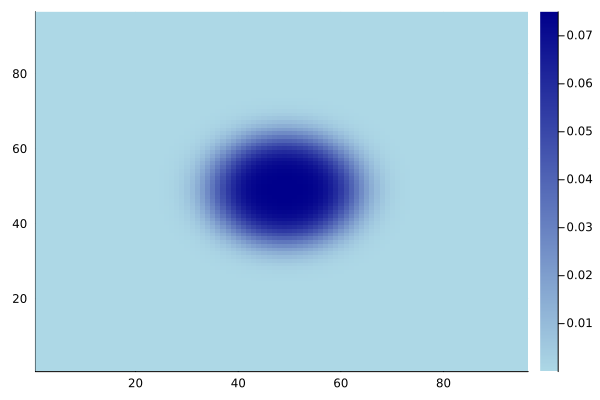

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)